# Paola Vargas Bravo
# Tarea 6.2

1. Entra en el siguiente enlace https://playground.tensorflow.org/ y configura los hiperparámetros de una red neuronal multicapa para separar las clases del dataset spiral, guarda el enlace y la captura de pantalla de tu entrenamiento y pégalos en un notebook de jupyter

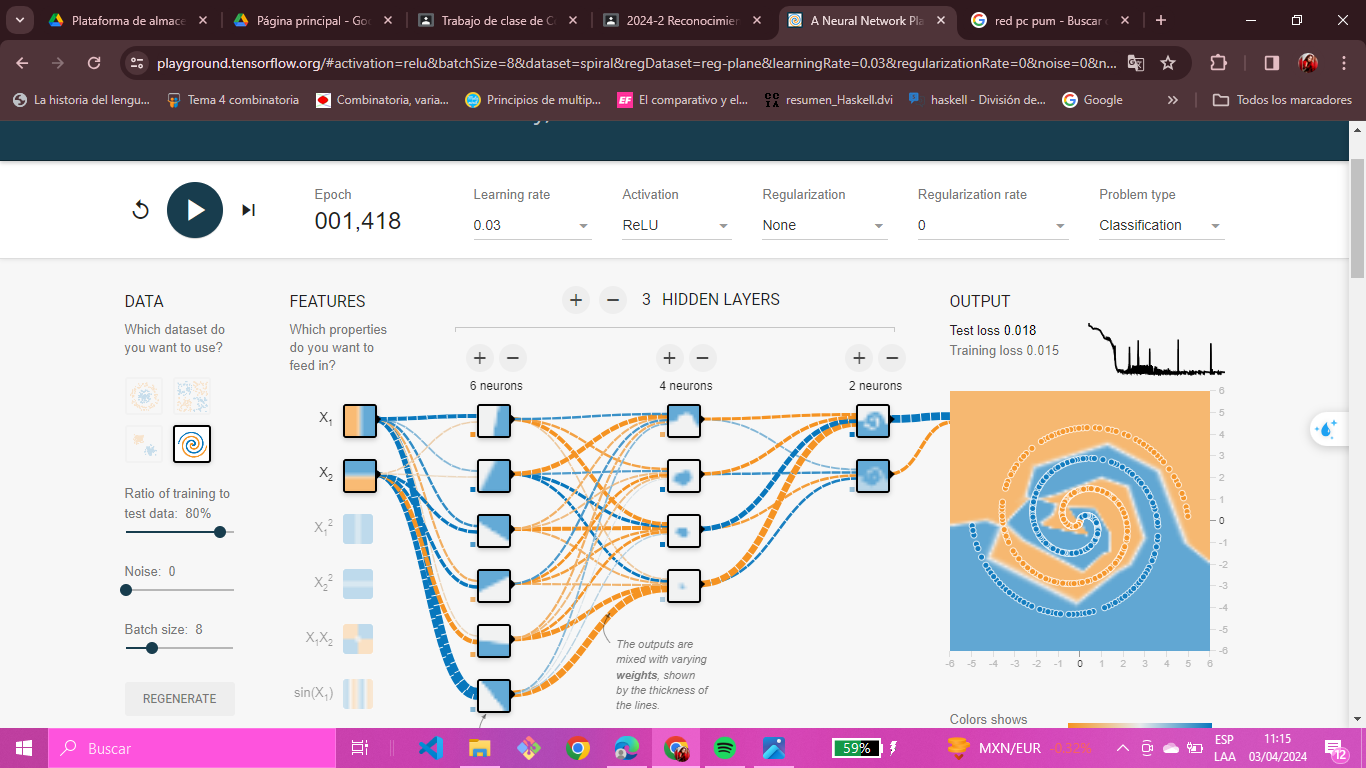

[Link de la Red Neuronal](https://playground.tensorflow.org/#activation=relu&batchSize=8&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6,4,2&seed=0.62068&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [18]:
# Función para generar datos de espirales
def generate_spiral_data(n_samples, d=1, noise=0.1):
    t = np.linspace(0, d*np.pi, n_samples)
    r1 = np.linspace(0, 1, n_samples) + noise * np.random.randn(n_samples)
    r2 = np.linspace(0, 1, n_samples) + noise * np.random.randn(n_samples)
    x1 = r1 * np.sin(2 * t)
    y1 = r1 * np.cos(2 * t)
    x2 = r2 * np.sin(2 * t + np.pi)
    y2 = r2 * np.cos(2 * t + np.pi)

    X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

    return X, y

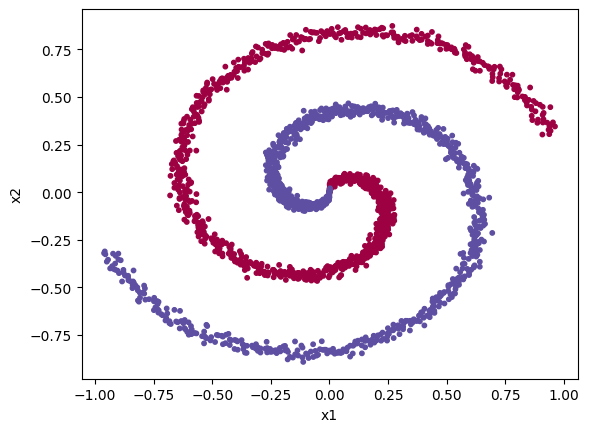

In [19]:
# Generar datos de espirales
X, y = generate_spiral_data(n_samples=1000, d=1.2, noise=0.02)

# Graficar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Dividir datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Función para definir y compilar el modelo de red neuronal
def create_model(hidden_layers):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_shape=(2,), activation='relu'))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [21]:
# Función para entrenar el modelo y devolver su historia de entrenamiento
def train_model(model, x_train, y_train, epochs=100, batch_size=32, validation_split=0.2):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)
    return history

In [22]:
# Función para graficar la frontera de decisión del modelo
def plot_decision_boundary(model, X, y, npts=50):
    xmin, xmax = X[:, 0].min(), X[:, 0].max()
    ymin, ymax = X[:, 1].min(), X[:, 1].max()
    dx, dy = (xmax - xmin)*0.1, (ymax - ymin)*0.1
    xx, yy = np.meshgrid(np.linspace(xmin-dx, xmax+dx, npts), np.linspace(ymin-dy, ymax+dy, npts))
    data = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(data)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors='k', levels=[-0.1, 0.1])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=10)

In [23]:
# Configuraciones de neuronas en capas ocultas
configurations = [
    [16, 8],
    [32, 16],
    [64, 32],
    [128, 64],
    [64, 64],
    [128, 128],
    [32, 32, 16],
    [64, 32, 16]
]

79/79 [==============================] - 0s 1ms/step


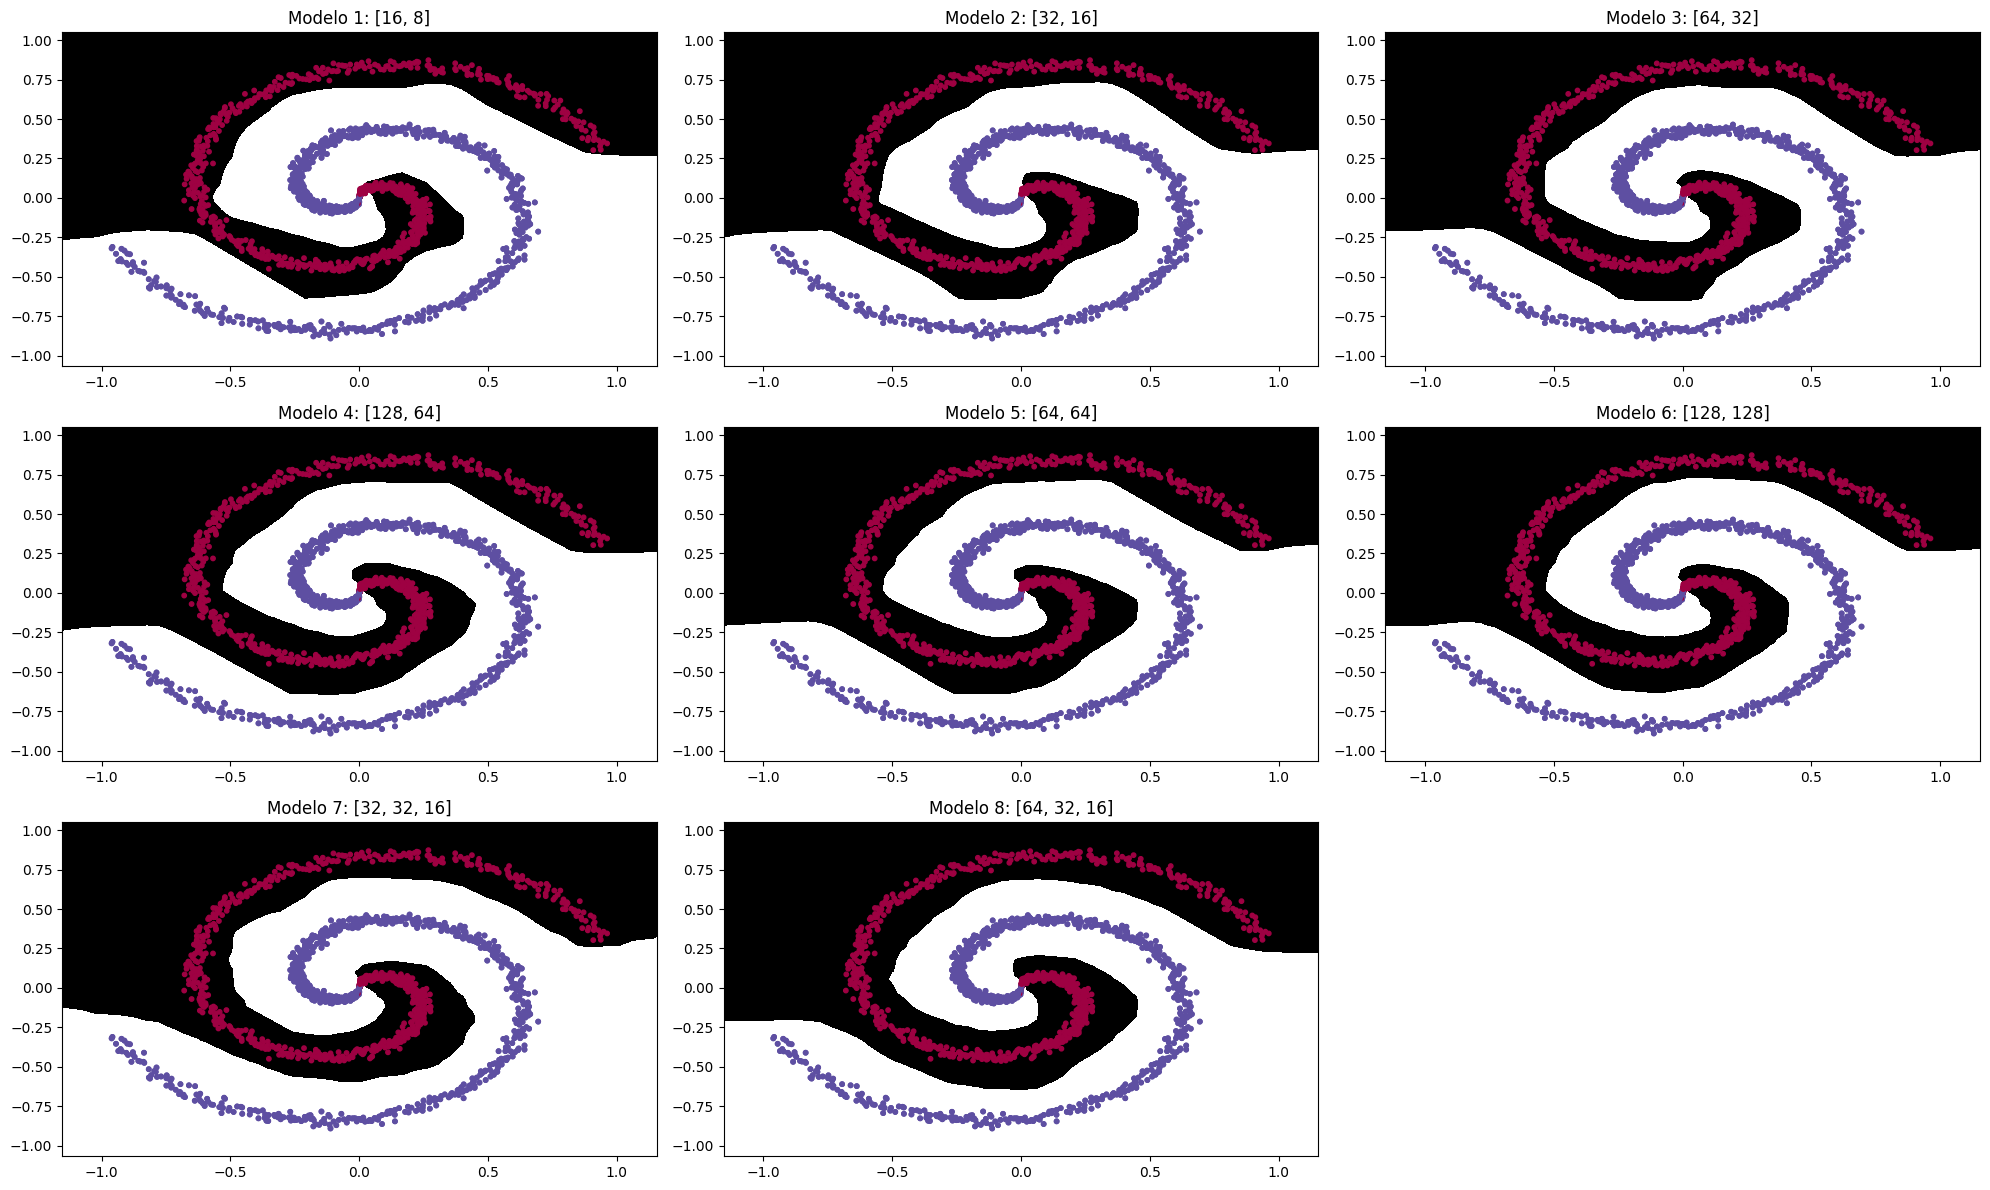

In [24]:
plt.figure(figsize=(20, 12))
histories = []

for i, config in enumerate(configurations, start=1):
    plt.subplot(3, 3, i)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Spectral, s=10)
    plt.title(f'Modelo {i}: {config}')
    model = create_model(config)
    history = train_model(model, x_train, y_train)
    plot_decision_boundary(model, x_train, y_train)
    histories.append(history)

plt.tight_layout()
plt.show()

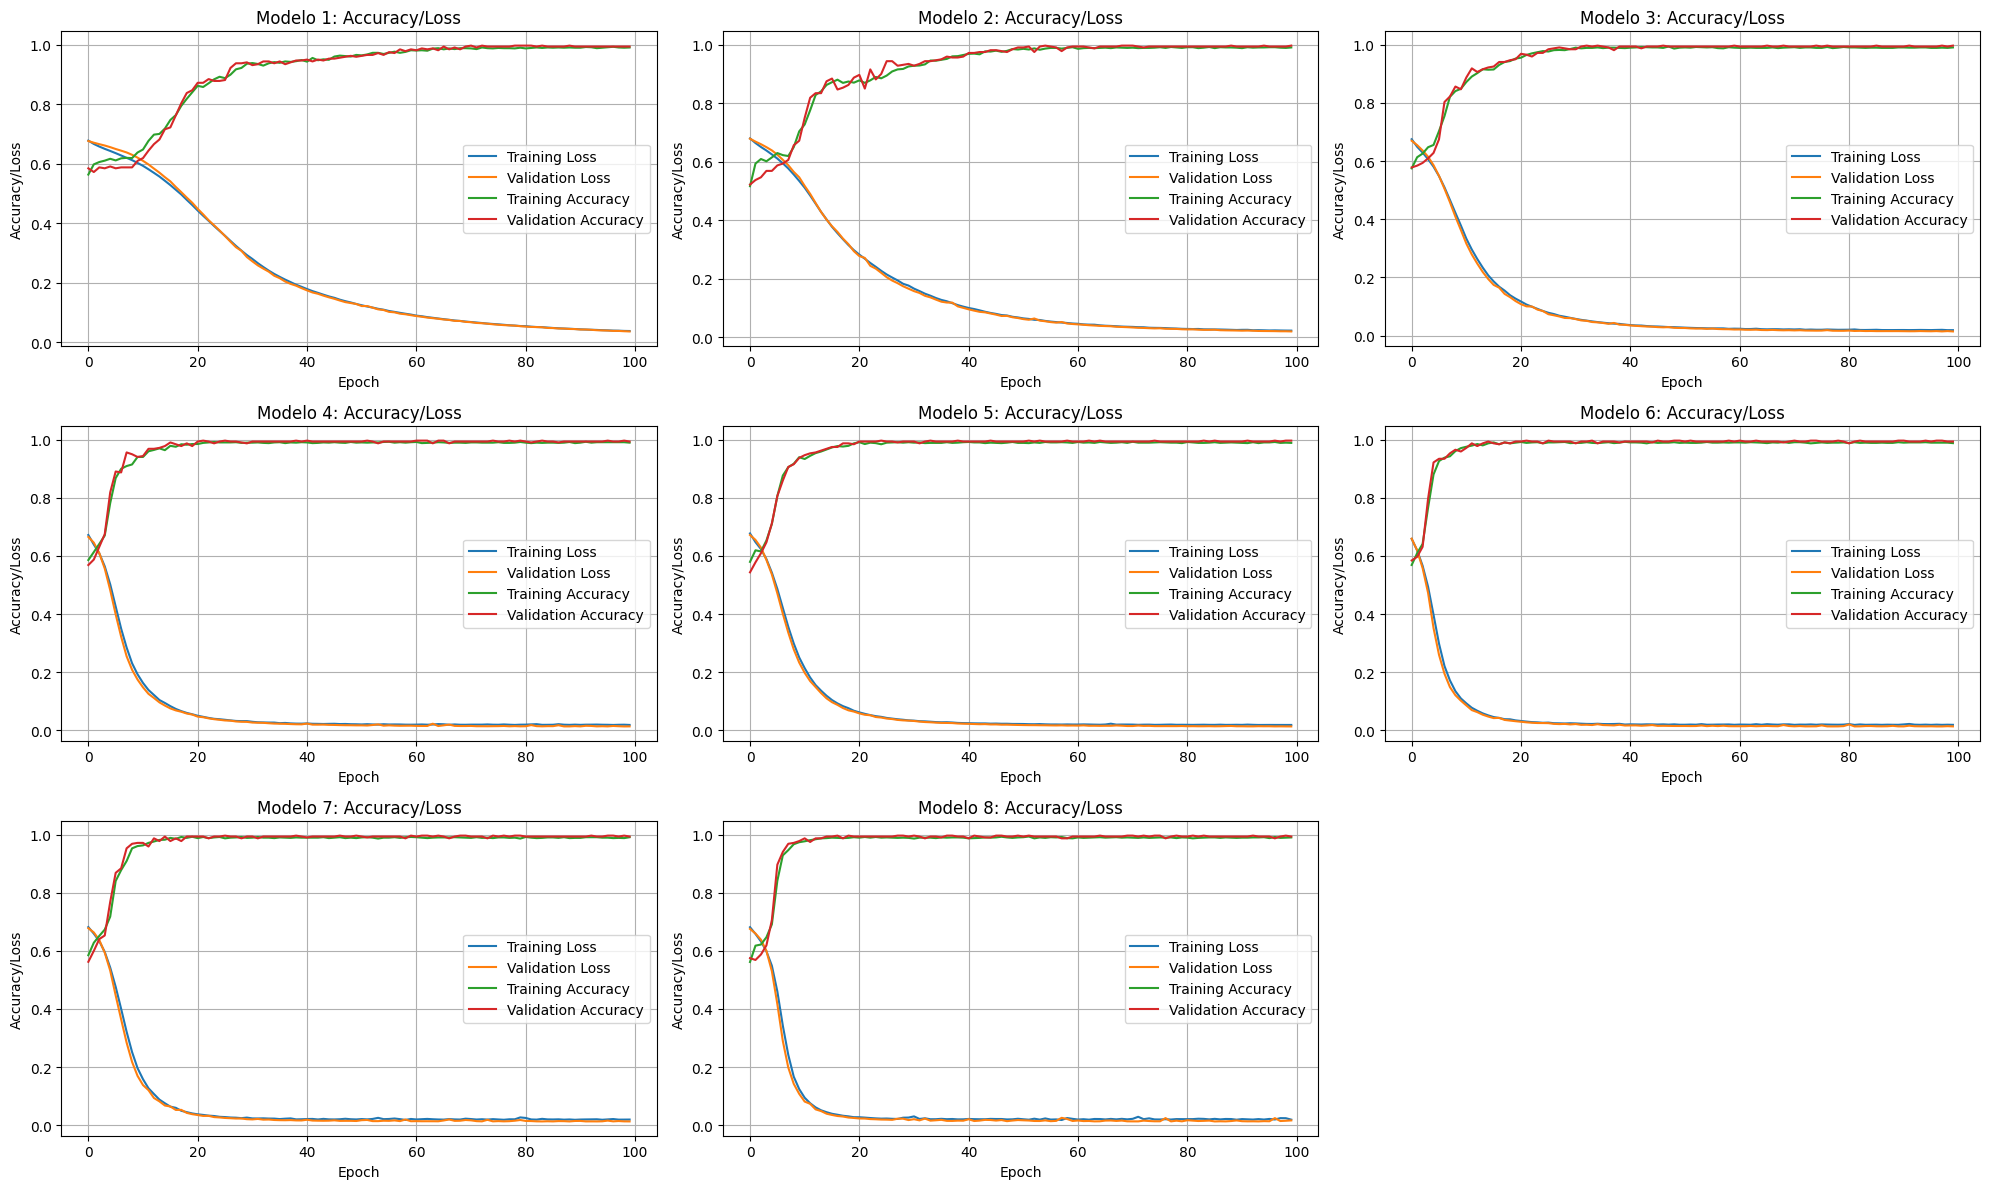

In [28]:
plt.figure(figsize=(20, 12))
for i, history in enumerate(histories, start=1):
    plt.subplot(3, 3, i)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Modelo {i}: Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 3, i)  # Mover a la siguiente fila
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Modelo {i}: Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend()
    plt.grid(True)

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Ajustar espacios vertical y horizontal
plt.tight_layout()
plt.show()
